In [129]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.ar_model import AutoReg

In [130]:
company_names = ['DBR', 'AMROBK', 'BACR-Bank', 'BNP', 'BYLAN', 'CMZB', 'CSGAG', 'DB',
                 'DZBK', 'ERGBA', 'HSBC', 'HSBC-HSBCBank', 'INTNED', 'LBW', 'NDB',
                 'SANPAO', 'SANTNDR', 'SEB', 'SOCGEN', 'UBS', 'UCBAG', 'BACF-BankNA',
                 'C', 'CRDSUI-USAInc', 'GS', 'JPM', 'MWD', 'RY', 'MIZUHBA', 'NOMURA']

company_names = ['AMROBK', 'BACR-Bank', 'BNP', 'BYLAN', 'CMZB', 'CSGAG', 'DB',
                 'DZBK', 'ERGBA', 'HSBC', 'HSBC-HSBCBank', 'INTNED', 'LBW', 'NDB',
                 'SANPAO', 'SANTNDR', 'SEB', 'SOCGEN', 'UBS', 'UCBAG', 'BACF-BankNA',
                 'C', 'CRDSUI-USAInc', 'GS', 'JPM', 'MWD', 'RY', 'MIZUHBA', 'NOMURA']

In [131]:
df_prices = pd.read_csv('Data/cleaned_spreads.csv')
df_prices.head()

,Date,DBR,AMROBK,BACR-Bank,BNP,BYLAN,CMZB,CSGAG,DB,DZBK,...,UCBAG,BACF-BankNA,C,CRDSUI-USAInc,GS,JPM,MWD,RY,MIZUHBA,NOMURA
0,16-12-15,8.0987,59.9553,59.5979,70.2880,78.1634,89.5873,85.6969,94.0470,79.8399,...,77.8846,73.2131,83.3913,82.7087,86.4448,75.6478,86.8967,60.0193,95.3847,72.3096
1,17-12-15,8.1809,60.8999,58.2724,69.8070,78.8935,85.9924,84.5083,92.9731,79.8490,...,77.3960,72.5302,81.0849,81.4686,84.5008,72.6121,84.9827,59.7699,92.2499,74.0992
2,18-12-15,8.1656,61.2130,60.6409,71.5936,78.6469,90.5804,86.2609,94.5435,79.8527,...,77.4035,72.4659,82.7367,81.4956,85.9183,73.5007,86.6896,58.2865,92.2498,75.2375
3,21-12-15,8.1647,60.8928,61.2405,72.2154,78.7569,90.6353,87.5892,96.1573,79.9221,...,78.8901,72.2373,83.3012,82.6190,86.1917,73.8786,86.7687,58.5826,92.5796,75.2423
4,22-12-15,8.1754,61.2091,60.5956,72.2073,79.0299,90.3317,87.7539,96.3618,79.8496,...,79.1427,71.9224,82.9142,82.6994,85.8843,73.1944,85.9890,58.1449,92.5795,78.2812


In [132]:
log_ret = np.log(df_prices[company_names].shift(1)/df_prices[company_names])
log_ret = log_ret.drop(index=[0])
log_ret.shape

# dates = df_prices['Date']
# print(dates)

(1304, 29)

In [133]:
for i,date in enumerate(df_prices['Date']):
    timestamp = datetime.strptime(date, '%d-%m-%y')
    df_prices['Date'][i] = timestamp
    
df_prices.head()

c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,DBR,AMROBK,BACR-Bank,BNP,BYLAN,CMZB,CSGAG,DB,DZBK,...,UCBAG,BACF-BankNA,C,CRDSUI-USAInc,GS,JPM,MWD,RY,MIZUHBA,NOMURA
0,2015-12-16 00:00:00,8.0987,59.9553,59.5979,70.2880,78.1634,89.5873,85.6969,94.0470,79.8399,...,77.8846,73.2131,83.3913,82.7087,86.4448,75.6478,86.8967,60.0193,95.3847,72.3096
1,2015-12-17 00:00:00,8.1809,60.8999,58.2724,69.8070,78.8935,85.9924,84.5083,92.9731,79.8490,...,77.3960,72.5302,81.0849,81.4686,84.5008,72.6121,84.9827,59.7699,92.2499,74.0992
2,2015-12-18 00:00:00,8.1656,61.2130,60.6409,71.5936,78.6469,90.5804,86.2609,94.5435,79.8527,...,77.4035,72.4659,82.7367,81.4956,85.9183,73.5007,86.6896,58.2865,92.2498,75.2375
3,2015-12-21 00:00:00,8.1647,60.8928,61.2405,72.2154,78.7569,90.6353,87.5892,96.1573,79.9221,...,78.8901,72.2373,83.3012,82.6190,86.1917,73.8786,86.7687,58.5826,92.5796,75.2423
4,2015-12-22 00:00:00,8.1754,61.2091,60.5956,72.2073,79.0299,90.3317,87.7539,96.3618,79.8496,...,79.1427,71.9224,82.9142,82.6994,85.8843,73.1944,85.9890,58.1449,92.5795,78.2812


In [134]:
df_SP500 = pd.read_csv('Data/S&P 500 Historical Data.csv')
df_SP500.head()

,Unnamed: 0,Date,Close,Open,High,Low,Vol.,Change %
0,1,"Dec 16, 2015",2073.07,"2,046.50","2,076.72","2,042.43",-,1.45%
1,2,"Dec 17, 2015",2041.89,"2,073.76","2,076.37","2,041.66",-,-1.50%
2,3,"Dec 18, 2015",2005.55,"2,040.81","2,040.81","2,005.33",-,-1.78%
3,4,"Dec 21, 2015",2021.15,"2,010.27","2,022.90","2,005.93",-,0.78%
4,5,"Dec 22, 2015",2038.97,"2,023.15","2,042.74","2,020.49",-,0.88%


In [135]:
for i,date in enumerate(df_SP500['Date']):
    timestamp = datetime.strptime(date, '%b %d, %Y')
    df_SP500['Date'][i] = timestamp
    
df_SP500.head()

c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Unnamed: 0,Date,Close,Open,High,Low,Vol.,Change %
0,1,2015-12-16 00:00:00,2073.07,"2,046.50","2,076.72","2,042.43",-,1.45%
1,2,2015-12-17 00:00:00,2041.89,"2,073.76","2,076.37","2,041.66",-,-1.50%
2,3,2015-12-18 00:00:00,2005.55,"2,040.81","2,040.81","2,005.33",-,-1.78%
3,4,2015-12-21 00:00:00,2021.15,"2,010.27","2,022.90","2,005.93",-,0.78%
4,5,2015-12-22 00:00:00,2038.97,"2,023.15","2,042.74","2,020.49",-,0.88%


In [136]:
df_prices = df_prices.rename(columns={'Unnamed: 0': 'Date'})
df_prices.head(-10)

,Date,DBR,AMROBK,BACR-Bank,BNP,BYLAN,CMZB,CSGAG,DB,DZBK,...,UCBAG,BACF-BankNA,C,CRDSUI-USAInc,GS,JPM,MWD,RY,MIZUHBA,NOMURA
0,2015-12-16 00:00:00,8.0987,59.9553,59.5979,70.2880,78.1634,89.5873,85.6969,94.0470,79.8399,...,77.8846,73.2131,83.3913,82.7087,86.4448,75.6478,86.8967,60.0193,95.3847,72.3096
1,2015-12-17 00:00:00,8.1809,60.8999,58.2724,69.8070,78.8935,85.9924,84.5083,92.9731,79.8490,...,77.3960,72.5302,81.0849,81.4686,84.5008,72.6121,84.9827,59.7699,92.2499,74.0992
2,2015-12-18 00:00:00,8.1656,61.2130,60.6409,71.5936,78.6469,90.5804,86.2609,94.5435,79.8527,...,77.4035,72.4659,82.7367,81.4956,85.9183,73.5007,86.6896,58.2865,92.2498,75.2375
3,2015-12-21 00:00:00,8.1647,60.8928,61.2405,72.2154,78.7569,90.6353,87.5892,96.1573,79.9221,...,78.8901,72.2373,83.3012,82.6190,86.1917,73.8786,86.7687,58.5826,92.5796,75.2423
4,2015-12-22 00:00:00,8.1754,61.2091,60.5956,72.2073,79.0299,90.3317,87.7539,96.3618,79.8496,...,79.1427,71.9224,82.9142,82.6994,85.8843,73.1944,85.9890,58.1449,92.5795,78.2812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290,2020-11-25 00:00:00,6.3194,21.2841,53.7151,33.7458,62.9837,39.6196,46.2856,59.3105,62.3308,...,40.2257,38.9735,49.3422,69.6866,52.4069,40.8127,45.8873,55.1752,36.4639,38.6317
1291,2020-11-26 00:00:00,6.3187,21.2200,54.8708,34.4393,62.9843,40.9145,45.9190,60.1160,63.2866,...,38.4282,38.6656,49.0774,69.6901,51.7119,40.6246,45.8609,55.2739,36.3862,38.6288
1292,2020-11-27 00:00:00,6.4230,21.1876,56.9423,34.7979,62.9248,40.9278,46.2457,59.9456,63.3435,...,36.8824,38.9987,49.6769,69.4019,50.5115,41.2763,46.1956,55.4384,36.0905,38.6338
1293,2020-11-30 00:00:00,6.3194,21.6747,57.1010,34.7467,62.8811,41.3458,47.0086,60.3161,63.0976,...,35.2232,38.9983,50.0222,69.3022,51.9010,41.1013,46.5167,55.3814,36.0124,39.3295


In [137]:
df_SP500.head()

,Unnamed: 0,Date,Close,Open,High,Low,Vol.,Change %
0,1,2015-12-16 00:00:00,2073.07,"2,046.50","2,076.72","2,042.43",-,1.45%
1,2,2015-12-17 00:00:00,2041.89,"2,073.76","2,076.37","2,041.66",-,-1.50%
2,3,2015-12-18 00:00:00,2005.55,"2,040.81","2,040.81","2,005.33",-,-1.78%
3,4,2015-12-21 00:00:00,2021.15,"2,010.27","2,022.90","2,005.93",-,0.78%
4,5,2015-12-22 00:00:00,2038.97,"2,023.15","2,042.74","2,020.49",-,0.88%


In [138]:
df_SP500fin = pd.read_csv('Data/S&P 500 Financials.csv')

In [139]:
# Generate timestamps
for i,date in enumerate(df_SP500fin['Date']):
    timestamp = datetime.strptime(date, '%m/%d/%y')
    df_SP500fin['Date'][i] = timestamp

c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [140]:
df_SP500fin.head(-1)

,Date,Open,High,Low,Close
0,2021-05-10 00:00:00,627.29,626.55,626.55,626.55
1,2021-05-07 00:00:00,623.92,627.29,627.29,627.29
2,2021-05-06 00:00:00,615.12,623.92,623.92,623.92
3,2021-05-05 00:00:00,609.40,615.12,615.12,615.12
4,2021-05-04 00:00:00,605.19,609.40,609.40,609.40
...,...,...,...,...,...
1352,2015-12-23 00:00:00,320.53,324.77,324.77,324.77
1353,2015-12-22 00:00:00,317.84,320.64,320.64,320.64
1354,2015-12-21 00:00:00,314.97,317.84,317.84,317.84
1355,2015-12-18 00:00:00,323.07,314.96,314.96,314.96


In [148]:
# Throw away unnessesary data
df_SP500fin = df_SP500fin.iloc[99:]

In [149]:
df_SP500.head(-1)

,Unnamed: 0,Date,Close,Open,High,Low,Vol.,Change %
0,1,2015-12-16 00:00:00,2073.07,"2,046.50","2,076.72","2,042.43",-,1.45%
1,2,2015-12-17 00:00:00,2041.89,"2,073.76","2,076.37","2,041.66",-,-1.50%
2,3,2015-12-18 00:00:00,2005.55,"2,040.81","2,040.81","2,005.33",-,-1.78%
3,4,2015-12-21 00:00:00,2021.15,"2,010.27","2,022.90","2,005.93",-,0.78%
4,5,2015-12-22 00:00:00,2038.97,"2,023.15","2,042.74","2,020.49",-,0.88%
...,...,...,...,...,...,...,...,...
1253,1254,2020-12-08 00:00:00,3702.25,"3,683.05","3,708.45","3,678.83",-,0.28%
1254,1255,2020-12-09 00:00:00,3672.82,"3,705.98","3,712.39","3,660.54",-,-0.79%
1255,1256,2020-12-10 00:00:00,3668.10,"3,659.13","3,678.49","3,645.18",-,-0.13%
1256,1257,2020-12-11 00:00:00,3663.46,"3,656.08","3,665.91","3,633.40",-,-0.13%


In [150]:
df_SP500fin.head(-1)

,Date,Open,High,Low,Close
99,2020-12-15 00:00:00,465.81,473.62,473.62,473.62
100,2020-12-14 00:00:00,471.58,465.81,465.81,465.81
101,2020-12-11 00:00:00,476.18,471.58,471.58,471.58
102,2020-12-10 00:00:00,475.41,476.18,476.18,476.18
103,2020-12-09 00:00:00,476.39,475.41,475.41,475.41
...,...,...,...,...,...
1352,2015-12-23 00:00:00,320.53,324.77,324.77,324.77
1353,2015-12-22 00:00:00,317.84,320.64,320.64,320.64
1354,2015-12-21 00:00:00,314.97,317.84,317.84,317.84
1355,2015-12-18 00:00:00,323.07,314.96,314.96,314.96


In [151]:
print(df_SP500.shape)
print(df_SP500fin.shape)

(1259, 8)
(1259, 5)


c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


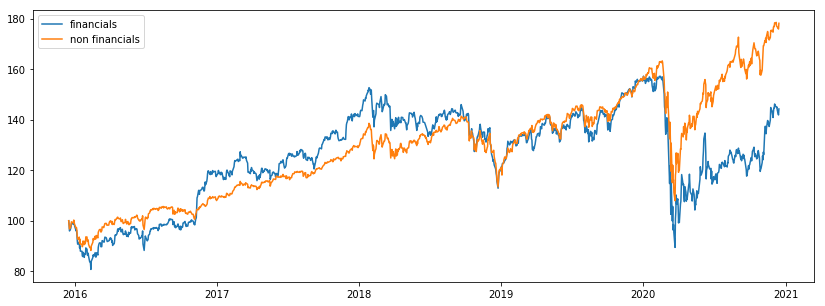

In [152]:
plt.figure(figsize=(14,5))
plt.plot(df_SP500fin['Date'], 100*df_SP500fin[' Close']/df_SP500fin[' Close'].iloc[-1], label='financials')
plt.plot(df_SP500['Date'], 100*df_SP500['Close']/df_SP500['Close'][0], label='non financials')
plt.legend()
plt.show()

In [153]:
df_prices.shape

(1305, 31)

In [154]:
df_SP500.shape

(1259, 8)

In [155]:
df_merged = pd.merge_ordered(df_prices, df_SP500fin, on='Date').fillna(method='backfill')
df_merged.head(-10)

,Date,DBR,AMROBK,BACR-Bank,BNP,BYLAN,CMZB,CSGAG,DB,DZBK,...,GS,JPM,MWD,RY,MIZUHBA,NOMURA,Open,High,Low,Close
0,2015-12-16,8.0987,59.9553,59.5979,70.2880,78.1634,89.5873,85.6969,94.0470,79.8399,...,86.4448,75.6478,86.8967,60.0193,95.3847,72.3096,322.95,328.26,328.26,328.26
1,2015-12-17,8.1809,60.8999,58.2724,69.8070,78.8935,85.9924,84.5083,92.9731,79.8490,...,84.5008,72.6121,84.9827,59.7699,92.2499,74.0992,328.23,323.07,323.07,323.07
2,2015-12-18,8.1656,61.2130,60.6409,71.5936,78.6469,90.5804,86.2609,94.5435,79.8527,...,85.9183,73.5007,86.6896,58.2865,92.2498,75.2375,323.07,314.96,314.96,314.96
3,2015-12-21,8.1647,60.8928,61.2405,72.2154,78.7569,90.6353,87.5892,96.1573,79.9221,...,86.1917,73.8786,86.7687,58.5826,92.5796,75.2423,314.97,317.84,317.84,317.84
4,2015-12-22,8.1754,61.2091,60.5956,72.2073,79.0299,90.3317,87.7539,96.3618,79.8496,...,85.8843,73.1944,85.9890,58.1449,92.5795,78.2812,317.84,320.64,320.64,320.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290,2020-11-25,6.3194,21.2841,53.7151,33.7458,62.9837,39.6196,46.2856,59.3105,62.3308,...,52.4069,40.8127,45.8873,55.1752,36.4639,38.6317,475.46,475.46,468.07,473.50
1291,2020-11-26,6.3187,21.2200,54.8708,34.4393,62.9843,40.9145,45.9190,60.1160,63.2866,...,51.7119,40.6246,45.8609,55.2739,36.3862,38.6288,473.50,471.52,471.52,471.52
1292,2020-11-27,6.4230,21.1876,56.9423,34.7979,62.9248,40.9278,46.2457,59.9456,63.3435,...,50.5115,41.2763,46.1956,55.4384,36.0905,38.6338,473.50,471.52,471.52,471.52
1293,2020-11-30,6.3194,21.6747,57.1010,34.7467,62.8811,41.3458,47.0086,60.3161,63.0976,...,51.9010,41.1013,46.5167,55.3814,36.0124,39.3295,471.52,462.45,462.45,462.45


In [156]:
df_merged = df_merged.rename(columns={' Close': 'Close'})

c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


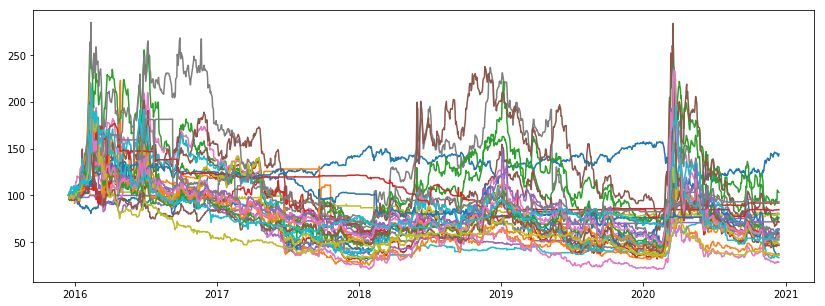

In [157]:
fig = plt.figure(figsize=(14,5))
plt.plot(df_merged['Date'], 100*df_merged['Close']/df_merged['Close'][0])
plt.plot(df_merged['Date'], 100*df_merged[company_names]/df_merged[company_names].iloc[0])
plt.show()

In [158]:
df_merged.to_csv('Data/SP_CDS_combined.csv')

In [159]:
print(df_merged['DBR'])
print((df_merged['DBR'].shift(-1)-df_merged['DBR'])/df_merged['DBR'])

0       8.0987
1       8.1809
2       8.1656
3       8.1647
4       8.1754
         ...  
1300    6.5235
1301    6.5237
1302    6.5855
1303    6.5254
1304    6.5836
Name: DBR, Length: 1305, dtype: float64
0       0.010150
1      -0.001870
2      -0.000110
3       0.001311
4      -0.010360
          ...   
1300    0.000031
1301    0.009473
1302   -0.009126
1303    0.008919
1304         NaN
Name: DBR, Length: 1305, dtype: float64


In [160]:
print(df_merged['Close'])
print((df_merged['Close'].shift(-1)-df_merged['Close'])/df_merged['Close'])

0       328.26
1       323.07
2       314.96
3       317.84
4       320.64
         ...  
1300    475.41
1301    476.18
1302    471.58
1303    465.81
1304    473.62
Name: Close, Length: 1305, dtype: float64
0      -0.015811
1      -0.025103
2       0.009144
3       0.008809
4       0.012880
          ...   
1300    0.001620
1301   -0.009660
1302   -0.012235
1303    0.016766
1304         NaN
Name: Close, Length: 1305, dtype: float64


In [161]:
logret_SP500 = np.log(df_merged['Close'].shift(-1)/df_merged['Close'])
logret_spreads = np.log(df_merged.loc[:, df_merged.columns.isin(company_names)].shift(-1)/df_merged.loc[:, df_merged.columns.isin(company_names)])

In [162]:
logret_SP500.head(-10)
# logret_SP500.shape

0      -0.015937
1      -0.025423
2       0.009102
3       0.008771
4       0.012798
          ...   
1290   -0.004190
1291    0.000000
1292   -0.019423
1293    0.015577
1294    0.010483
Name: Close, Length: 1295, dtype: float64

In [163]:
logret_spreads.head(-97)

,AMROBK,BACR-Bank,BNP,BYLAN,CMZB,CSGAG,DB,DZBK,ERGBA,HSBC,...,UCBAG,BACF-BankNA,C,CRDSUI-USAInc,GS,JPM,MWD,RY,MIZUHBA,NOMURA
0,0.015632,-0.022492,-0.006867,0.009297,-0.040955,-0.013967,-0.011484,0.000114,-0.015443,-0.033749,...,-0.006293,-0.009371,-0.028047,-0.015107,-0.022745,-0.040957,-0.022272,-0.004164,-0.033417,0.024448
1,0.005128,0.039841,0.025271,-0.003131,0.051979,0.020527,0.016750,0.000046,-0.001782,-0.021532,...,0.000097,-0.000887,0.020167,0.000331,0.016636,0.012163,0.019886,-0.025132,-0.000001,0.015245
2,-0.005245,0.009839,0.008648,0.001398,0.000606,0.015281,0.016925,0.000869,0.008223,0.020310,...,0.019024,-0.003160,0.006800,0.013691,0.003177,0.005128,0.000912,0.005067,0.003569,0.000064
3,0.005181,-0.010586,-0.000112,0.003460,-0.003355,0.001879,0.002124,-0.000908,0.003672,-0.009865,...,0.003197,-0.004369,-0.004657,0.000973,-0.003573,-0.009304,-0.009027,-0.007500,-0.000001,0.039594
4,0.002615,-0.011943,-0.006894,0.001645,-0.014753,-0.019063,-0.020093,-0.003229,-0.000206,0.000730,...,-0.003321,-0.000122,-0.012040,-0.000145,-0.014135,-0.022210,-0.014954,-0.000141,0.044940,0.009902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203,0.018065,0.010250,0.024518,-0.000276,0.047402,0.028371,0.041072,0.003070,0.035084,0.062630,...,0.002651,0.012002,0.020126,-0.000251,0.033757,0.023168,0.035400,-0.001943,-0.006923,0.061547
1204,0.008899,0.015960,0.000400,0.000536,0.014837,0.018255,0.000995,0.007854,0.005664,0.009007,...,0.002660,0.010536,-0.004318,0.000063,0.000237,0.001610,0.003199,-0.000164,-0.000472,0.020531
1205,0.022834,0.043067,0.040783,0.000204,0.028555,0.023942,0.025681,-0.010942,0.003862,0.073051,...,-0.000325,0.003169,0.043147,-0.000048,0.017407,0.014743,0.011866,-0.000182,-0.000732,-0.034398
1206,0.011219,-0.004549,-0.018028,0.000184,-0.009333,-0.016641,-0.012203,0.013286,0.001433,-0.009284,...,0.014367,0.002616,-0.001393,0.000037,-0.005207,0.013610,0.015926,0.000034,-0.000727,-0.171592


<function matplotlib.pyplot.show(*args, **kw)>

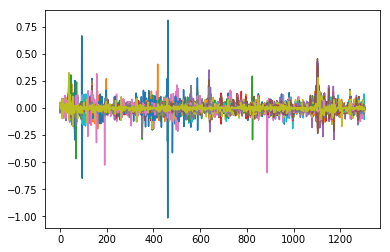

In [164]:
plt.plot(logret_spreads)
plt.show

In [165]:
detrended = {}

for company_name in company_names:  
#     X = np.column_stack((logret_SP500[:-2], logret_spreads[company_name].shift(-1)[:-2]))
    X = logret_SP500[:-100]
#     X = df_merged['Close'][:-1303]
    X = sm.add_constant(X)
    y = logret_spreads[company_name][:-100]


#     y = df_merged[company_name][:-1303]
    
#     print(y)
#     print(X)

    mod = sm.OLS(y, X)
    res = mod.fit()
    print(res.summary())
    
#     detrend = logret_spreads[company_name] - coeff*logret_SP500
#     detrended[company_name] = detrend
    
df_detrended = pd.DataFrame(detrended)
df_detrended.to_csv('cleaned_spreads_detrended.csv')

                            OLS Regression Results                            
Dep. Variable:                 AMROBK   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     19.58
Date:                Fri, 28 May 2021   Prob (F-statistic):           1.05e-05
Time:                        12:40:34   Log-Likelihood:                 1808.2
No. Observations:                1205   AIC:                            -3612.
Df Residuals:                    1203   BIC:                            -3602.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0006      0.002     -0.377      0.7

                            OLS Regression Results                            
Dep. Variable:                    MWD   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     261.8
Date:                Fri, 28 May 2021   Prob (F-statistic):           1.97e-53
Time:                        12:40:34   Log-Likelihood:                 2421.1
No. Observations:                1205   AIC:                            -4838.
Df Residuals:                    1203   BIC:                            -4828.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.001     -0.177      0.8

In [166]:
detrended = {}

for i,company_name in enumerate(company_names):  
    names = [cn for j,cn in enumerate(company_names) if j!=i]
    
    avg_returns = logret_spreads[names].mean(axis=1)
    
#     print(avg_returns)
    
#     X = np.column_stack((logret_SP500[:-2], logret_spreads[company_name].shift(-1)[:-2]))
#     X = logret_spreads[names]
    X = avg_returns.iloc[:-2]
    X = sm.add_constant(X)

    mod = sm.OLS(logret_spreads[company_name][:-2], X)
    res = mod.fit()
    print(res.summary())
    
    detrend = logret_spreads[company_name] - coeff*logret_SP500
    detrended[company_name] = detrend
    
# df_detrended = pd.DataFrame(detrended)
# df_detrended.to_csv('cleaned_spreads_detrended.csv', index=False)

                            OLS Regression Results                            
Dep. Variable:                 AMROBK   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     87.56
Date:                Fri, 28 May 2021   Prob (F-statistic):           3.46e-20
Time:                        12:40:35   Log-Likelihood:                 2029.6
No. Observations:                1303   AIC:                            -4055.
Df Residuals:                    1301   BIC:                            -4045.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.001     -0.358      0.7

NameError: name 'coeff' is not defined

In [167]:
# Now let the regression run over different intervals
intervalsize = 200
intervals = np.arange(0,1200,intervalsize)
for interval in intervals:
    y = logret_spreads[company_name][interval:interval+intervalsize]
    X = logret_SP500[interval:interval+intervalsize]
    X = sm.add_constant(X)
    mod = sm.OLS(y, X)
    res = mod.fit()
    print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                 AMROBK   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.389
Date:                Fri, 28 May 2021   Prob (F-statistic):              0.240
Time:                        12:40:38   Log-Likelihood:                 250.81
No. Observations:                 200   AIC:                            -497.6
Df Residuals:                     198   BIC:                            -491.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.005      0.176      0.8

In [168]:
company_name = 'AMROBK'

y = logret_spreads[company_name][:-1]
X = logret_spreads.mean(axis=1)[:-1]
X = sm.add_constant(X)
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 AMROBK   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     166.8
Date:                Fri, 28 May 2021   Prob (F-statistic):           5.49e-36
Time:                        12:40:43   Log-Likelihood:                 2067.7
No. Observations:                1304   AIC:                            -4131.
Df Residuals:                    1302   BIC:                            -4121.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.001     -0.295      0.7

In [169]:
plot_lookback = 2

fig = plt.figure(figsize=(16,5))
# plt.plot(df_prices['Date'][:-lookback], logret_SP500[:-lookback])
# plt.plot(df_prices['Date'][:-lookback], logret_spreads['DBR'][:-lookback]-detrended['DBR'][:-lookback])
plt.plot(df_prices['Date'][:-plot_lookback], logret_spreads['DBR'][:-plot_lookback], alpha=0.4, label='no detrend')
plt.plot(df_prices['Date'][:-plot_lookback], detrended[company_name][:-plot_lookback], alpha=0.4, label='detrend')
plt.legend()
plt.show()

KeyError: 'DBR'

<Figure size 1152x360 with 0 Axes>

### Try with SP500 financials

In [170]:
for company_name in [company_names[3]]:  
#     X = np.column_stack((logret_SP500[:-2], logret_spreads[company_name].shift(-1)[:-2]))
    X = logret_SP500[100:]
#     X = df_merged['Close'][:-100]
#     X = sm.add_constant(X)
    y = logret_spreads[company_name][100:]


#     y = df_merged[company_name][:-100]
    
#     print(y)
#     print(X)

    mod = AutoReg(endog=y, exog=X, lags=3)
    res = mod.fit()
    print(res.summary())
    
#     detrend = logret_spreads[company_name] - coeff*logret_SP500
#     detrended[company_name] = detrend
    
# df_detrended = pd.DataFrame(detrended)
# df_detrended.to_csv('cleaned_spreads_detrended.csv')

MissingDataError: exog contains inf or nans

### Betas with rolling window

0      -0.015937
1      -0.025423
2       0.009102
3       0.008771
4       0.012798
          ...   
1300    0.001618
1301   -0.009707
1302   -0.012311
1303    0.016627
1304         NaN
Name: Close, Length: 1305, dtype: float64


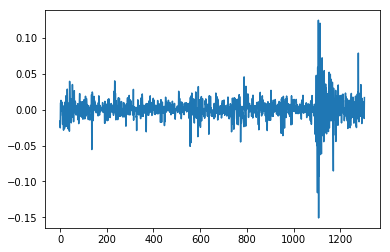

In [171]:
print(logret_SP500)
plt.plot(range(len(logret_SP500.values)), logret_SP500.values)

In [176]:
start_window = 100
end_window = 1305

all_betas = {}

windows = np.arange(start_window,end_window)

for company_name in company_names:
# for company_name in ['DB']:

#     df_comp = logret_spreads[company_name].iloc[100:]
    betas = []
    for window in windows:
        y = np.log(1+logret_spreads[company_name].iloc[window-start_window:window])
        X = np.log(1+logret_SP500.iloc[window-start_window:window])
#         print(X.head(-10))
#         print(y.head(-10))
        X = sm.add_constant(X)
        mod = sm.OLS(y, X)
        res = mod.fit()
        if res.pvalues[1] < 0.1:
            betas += [res.params[1]]
        else:
            betas += [0]
            
    all_betas[company_name] = betas

c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\pandas\core\arraylike.py:274: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\pandas\core\arraylike.py:274: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\pandas\core\arraylike.py:274: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\pandas\core\arraylike.py:274: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\pandas\core\arraylike.py:274: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)

c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\pandas\core\arraylike.py:274: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\pandas\core\arraylike.py:274: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\pandas\core\arraylike.py:274: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\pandas\core\arraylike.py:274: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\pandas\core\arraylike.py:274: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)

In [177]:
print(all_betas['DB'])

[-1.7768415367431896, -1.8150767802877077, -1.8591189686049843, -1.871871624257356, -1.8732579091473789, -1.8584062309535399, -1.8603450429607307, -1.850650842366754, -1.835456024212713, -1.8303924590416805, -1.7908952551735802, -1.7858728096865961, -1.8413334932573067, -1.84091302458801, -1.8315918600975936, -1.8643513368307238, -1.9264021323506277, -1.9682926025174834, -1.966874295062297, -1.9680350519459968, -2.062745751542997, -2.1016649023251976, -2.112438620670079, -2.1090477847869002, -2.101452161576211, -2.03394911108092, -2.0376485765217276, -2.0200720480685703, -2.0414627535058187, -2.169472485790081, -2.172302507875534, -2.160903894880976, -2.3963240005148543, -2.407251465377724, -2.421748267907782, -2.413763859308228, -2.4570190978102824, -2.6014284240525267, -2.4196915136902355, -2.3245685953331483, -2.387180699680987, -2.246361301637859, -2.075651694136977, -2.0610443036353416, -2.0636507459990847, -2.075236427673291, -2.1037076049634913, -2.129044903822184, -2.0730753771

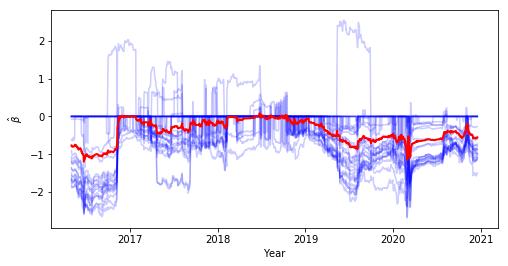

In [180]:
# Plot betas and average beta
fig = plt.figure(figsize=(8,4))

for company_name in company_names:
    plt.plot(df_merged['Date'].iloc[100:1305], all_betas[company_name], alpha=0.2, color='blue')

avg_beta = np.mean(np.array(list(all_betas.values())), axis=0)
plt.plot(df_merged['Date'].iloc[100:1305], avg_beta, color='red', linewidth=2)

plt.ylabel(r'$\hat{\beta}$')
plt.xlabel('Year')
plt.savefig('Figures/betas_over_time.pdf', bbox_inches='tight')
plt.show()

In [181]:
# Use beta estimates to detrend the data

all_detrended = {}

total_len = len(all_betas['BNP'])

for company_name in company_names:
    print(logret_spreads[company_name].shape)
    logret = logret_spreads[company_name].iloc[100:]
    SP500f = logret_SP500.iloc[100:]
    betas = all_betas[company_name]
    print(logret.shape)
    print(len(betas))
    detrended = logret - betas*SP500f
    
    all_detrended[company_name] = detrended

(1305,)
(1205,)
1205
(1305,)
(1205,)
1205
(1305,)
(1205,)
1205
(1305,)
(1205,)
1205
(1305,)
(1205,)
1205
(1305,)
(1205,)
1205
(1305,)
(1205,)
1205
(1305,)
(1205,)
1205
(1305,)
(1205,)
1205
(1305,)
(1205,)
1205
(1305,)
(1205,)
1205
(1305,)
(1205,)
1205
(1305,)
(1205,)
1205
(1305,)
(1205,)
1205
(1305,)
(1205,)
1205
(1305,)
(1205,)
1205
(1305,)
(1205,)
1205
(1305,)
(1205,)
1205
(1305,)
(1205,)
1205
(1305,)
(1205,)
1205
(1305,)
(1205,)
1205
(1305,)
(1205,)
1205
(1305,)
(1205,)
1205
(1305,)
(1205,)
1205
(1305,)
(1205,)
1205
(1305,)
(1205,)
1205
(1305,)
(1205,)
1205
(1305,)
(1205,)
1205
(1305,)
(1205,)
1205


In [182]:
df_detrended_movingbeta = pd.DataFrame(all_detrended)
df_detrended_movingbeta.to_csv('Data/cleaned_spreads_detrended_movingbeta.csv', index=False)

c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


ValueError: x and y must have same first dimension, but have shapes (1204,) and (1203,)

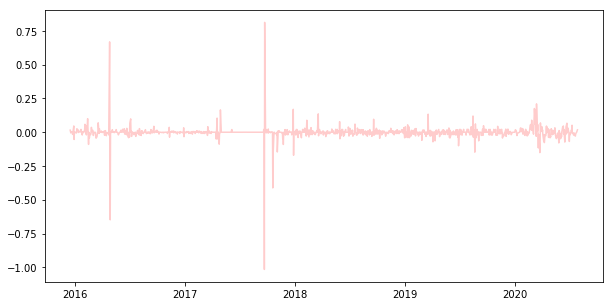

In [98]:
# Plot betas and average beta
fig = plt.figure(figsize=(10,5))

for company_name in company_names:
    plt.plot(df_merged['Date'].iloc[:-200], logret_spreads[company_name].iloc[:-200], alpha=0.2, color='red')
    plt.plot(df_merged['Date'].iloc[:-200], all_detrended[company_name], alpha=0.2, color='blue')

# avg_beta = np.mean(np.array(list(all_betas.values())), axis=0)
# plt.plot(df_merged['Date'].iloc[:-200], avg_beta, color='red', linewidth=2)

plt.ylabel(r'$\hat{\beta}$')
plt.xlabel('time')
# plt.savefig('Figures/betas_over_time.pdf', bbox_inches='tight')
plt.show()